# [ EXPLORATION CELL ]

## Hello data, who are you?

In [123]:
import pandas as pd

# --- EXPLORATION CELL ---
# Load your dataset as df
df= pd.read_csv('data/properties.csv')

# How big are ya? Number of observations & features
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# What do you look like? First 5 rows
#print(df.head())

# Do you have any duplicates?
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

# Do you have any missing values?
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(f"Columns with missing values: {len(columns_with_missing_values)} out of {df.shape[1]}")

percent_missing = (columns_with_missing_values / df.shape[0]) * 100
percent_missing_sorted = percent_missing.sort_values(ascending=False)
print("Index", "| Feature |", "| Missing values |", sep="\t")
for index, (feature, percent) in enumerate(percent_missing_sorted.items(), start=1):
    print(index, feature, f"{percent:.2f}%", sep="\t")


Number of observations: 75511
Number of features: 30
Number of duplicates: 0
Columns with missing values: 10 out of 30
Index	| Feature |	| Missing values |
1	cadastral_income	59.55%
2	surface_land_sqm	48.01%
3	construction_year	44.22%
4	primary_energy_consumption_sqm	35.18%
5	nbr_frontages	34.89%
6	latitude	18.67%
7	longitude	18.67%
8	terrace_sqm	17.40%
9	total_area_sqm	10.08%
10	garden_sqm	3.89%


In [124]:
# --- EXPLORATION CELL ---
print(df.columns) # get column names

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')


# [ ACTION CELL ]

## Action no. 1: Dropping columns (type: cleaning)

- we drop columns with over 50% missing values
- we drop "ID" because it's not useful

In [125]:
# -- ACTION CELL --
# Drop columns with more than 50% missing values (for this dataset, it's only one: cadastral_income)
columns_to_drop = percent_missing[percent_missing > 50].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {list(columns_to_drop)}")

# Drop ID columns (for this dataset, it's only one: id)
df.drop(columns="id", inplace=True)

Dropped columns: ['cadastral_income']


# [ ACTION CELL ]

## Action no.2 : Dropping duplicates (type: cleaning)
- dropping duplicates if any, and printing the number of duplicates dropped

In [126]:
# -- ACTION CELL --

# Drop duplicates, if any
duplicates = df.duplicated().sum()
if duplicates > 0:
    shape_before = df.shape
    df = df.drop_duplicates()
    shape_after = df.shape
    print(f"{duplicates} duplicates removed. Shape before: {shape_before}, Shape after: {shape_after}")
else:
    print("No duplicates found.")

10 duplicates removed. Shape before: (75511, 28), Shape after: (75501, 28)


# [ EXPLORATION CELL ]

## Numerical vs categorical columns

In [127]:
# -- EXPLORATION CELL --

# How d'ya look post-actions? Number of observations & features
print("Current observations:", df.shape[0])
print("Current features:", df.shape[1])

# How many numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical features:", len(numerical_cols))
# How many categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Number of categorical features:", len(categorical_cols), "\n")


Current observations: 75501
Current features: 28
Number of numerical features: 19
Number of categorical features: 9 



# [ EXPLORATION CELL ]

## NUMERICAL DATA


In [128]:
# -- EXPLORATION CELL, NUMERICAL --
import numpy as np

# Count numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical features:", len(numerical_cols))

# Summary statistics for numerical columns only
print(df.describe(include=[np.number]))


Number of numerical features: 19
              price      zip_code      latitude     longitude  \
count  7.550100e+04  75501.000000  61404.000000  61404.000000   
mean   4.227671e+05   5144.724653     50.886610      4.328706   
std    4.383754e+05   3005.411545      0.349741      0.950936   
min    7.600000e+04   1000.000000     25.761680    -80.191790   
25%    2.420000e+05   2240.000000     50.705785      3.764076   
50%    3.290000e+05   4683.000000     50.900902      4.376740   
75%    4.550000e+05   8370.000000     51.148639      4.876499   
max    2.250000e+07   9992.000000     52.434244      6.385048   

       construction_year  total_area_sqm  surface_land_sqm  nbr_frontages  \
count       42115.000000    67886.000000      39252.000000   49156.000000   
mean         1984.413534      163.670315       1157.052838       2.803015   
std            41.522077      415.879075      10117.718774       0.889176   
min          1753.000000        3.000000          0.000000       1.000000

# [ EXPLORATION CELL]

## CATEGORICAL DATA

- Check unique values and frequency of each unique value.
- Explore binning options, if any.
- Explore feature slicing options, if any.

In [129]:
# -- EXPLORATION CELL, CATEGORICAL-

# Let's see the unique values for each categorical column
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

property_type: ['APARTMENT' 'HOUSE']
subproperty_type: ['APARTMENT' 'HOUSE' 'DUPLEX' 'VILLA' 'EXCEPTIONAL_PROPERTY' 'FLAT_STUDIO'
 'GROUND_FLOOR' 'PENTHOUSE' 'FARMHOUSE' 'APARTMENT_BLOCK'
 'COUNTRY_COTTAGE' 'TOWN_HOUSE' 'SERVICE_FLAT' 'MANSION'
 'MIXED_USE_BUILDING' 'MANOR_HOUSE' 'LOFT' 'BUNGALOW' 'KOT' 'CASTLE'
 'CHALET' 'OTHER_PROPERTY' 'TRIPLEX']
region: ['Flanders' 'Brussels-Capital' 'Wallonia' 'MISSING']
province: ['Antwerp' 'East Flanders' 'Brussels' 'Walloon Brabant' 'Flemish Brabant'
 'Liège' 'West Flanders' 'Hainaut' 'Luxembourg' 'Limburg' 'Namur'
 'MISSING']
locality: ['Antwerp' 'Gent' 'Brussels' 'Turnhout' 'Nivelles' 'Halle-Vilvoorde'
 'Liège' 'Brugge' 'Sint-Niklaas' 'Veurne' 'Verviers' 'Mechelen'
 'Charleroi' 'Dendermonde' 'Bastogne' 'Leuven' 'Hasselt' 'Mons' 'Aalst'
 'Tournai' 'Oostend' 'Oudenaarde' 'Philippeville' 'Kortrijk' 'Dinant'
 'Ieper' 'Huy' 'Marche-en-Famenne' 'Namur' 'Maaseik' 'Mouscron'
 'Diksmuide' 'Soignies' 'Neufchâteau' 'Arlon' 'Tongeren' 'Waremme' 'Thuin'
 

# [ EXPLORATION CELL ]

## DATAVIZ - understanding data distributions

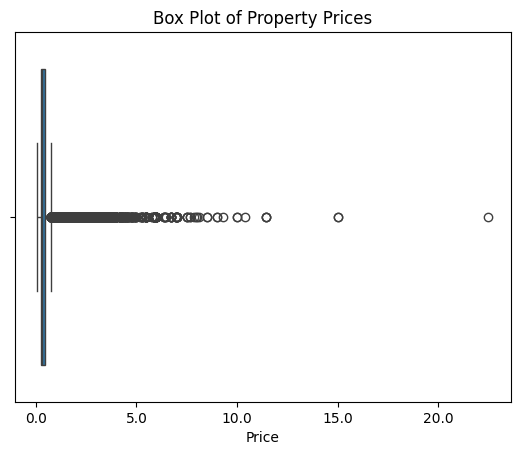

In [130]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure 'price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Creating a box plot
sns.boxplot(x=df['price'])
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

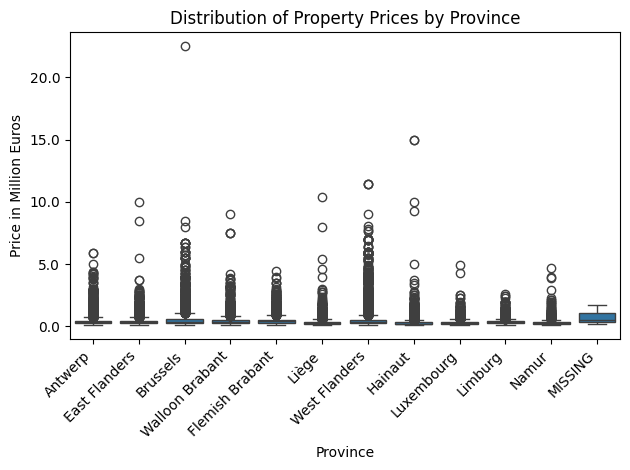

In [131]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Thoughts:

Looking at the graph above, there are TWO massive outliers that stand out: 
- one in Brussels
- one in Hainaut


# [ ACTION CELL ]
## REMOVE 2 OUTLIERS

## CAREFUL: From now on, we work with **df_1**

In [132]:
# -- ACTION CELL, OUTLIERS --


# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# BAD WAY of creating a new df apparently, kept hitting a warning message:
# df_2 = df_1[df_1['Price'] < 14000000]

#This is the GOOD WAY to create a new df with a subset of the original df, by using the .copy() method
df_1 = df[df['price'] <= 14000000].copy()

# Print the number of rows and columns in the new DataFrame
print("Number of observations (rows) WITH outliers:", df.shape[0])
print("Number of observations (rows) WITHOUT outliers:", df_1.shape[0])
print("Number of columns in newest df:", df_1.shape[1])

Number of observations (rows) WITH outliers: 75501
Number of observations (rows) WITHOUT outliers: 75498
Number of columns in newest df: 28


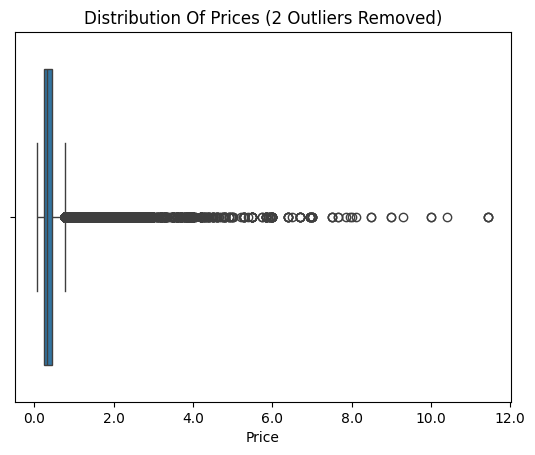

In [133]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure 'price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Creating a box plot
sns.boxplot(x=df_1['price'])
plt.title('Distribution Of Prices (2 Outliers Removed)')
plt.xlabel('Price')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

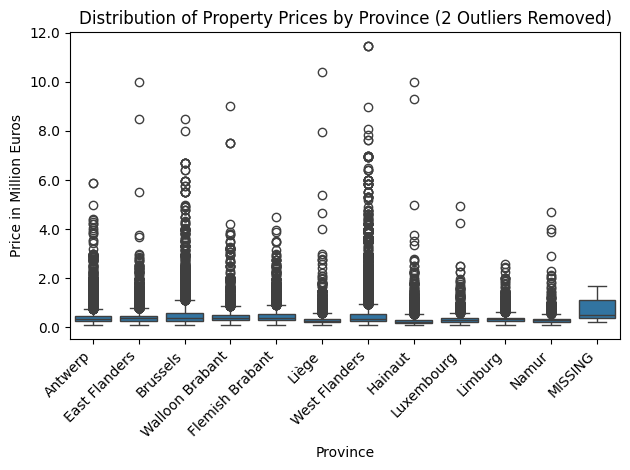

In [134]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province (2 Outliers Removed)')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

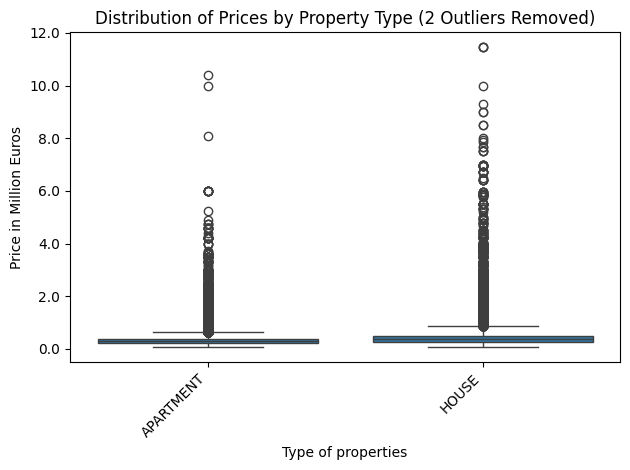

In [135]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='property_type', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Type of properties')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Prices by Property Type (2 Outliers Removed)')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

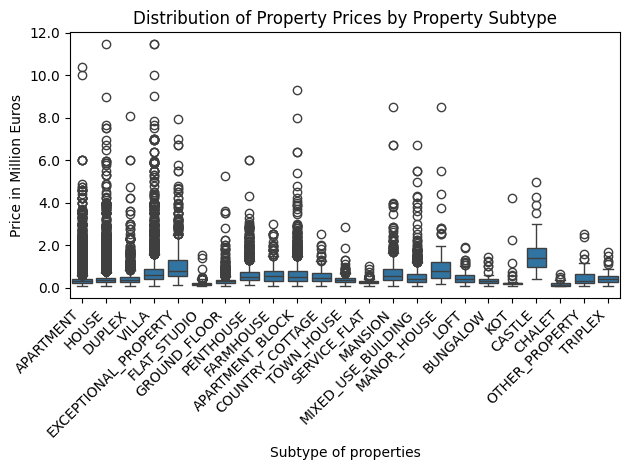

In [136]:
# -- EXPLORATION CELL, DISTRIBUTIONS --

# Ensure that 'Price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='subproperty_type', y='price', data=df_1)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Subtype of properties')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Property Subtype')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

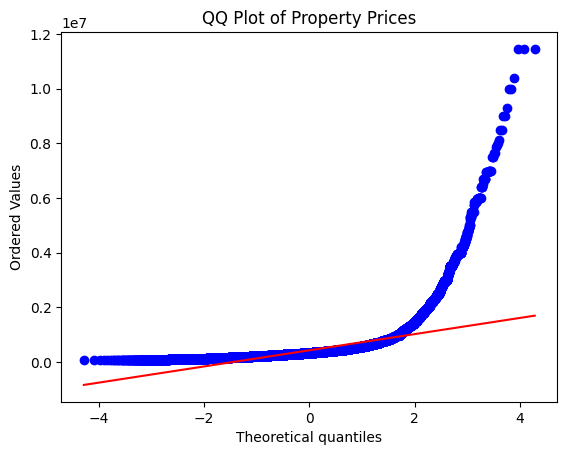

In [137]:
import scipy.stats as stats

# Generating a QQ plot
stats.probplot(df_1['price'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.show()

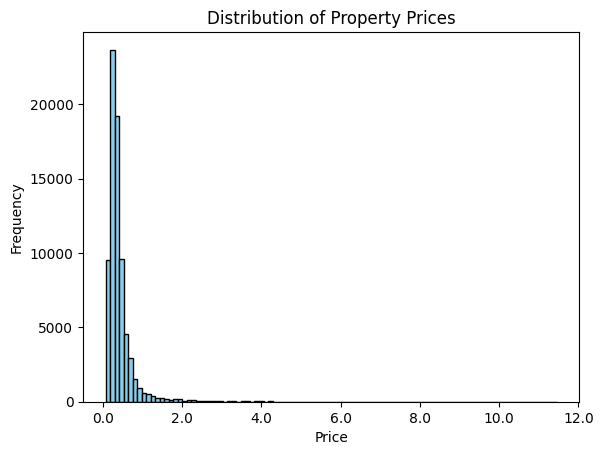

In [138]:
import matplotlib.pyplot as plt

# Ensure 'price' is in numeric format
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')

# Plotting the histogram
plt.hist(df_1['price'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Format the x-axis to show prices in millions with one decimal place
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

# Logarithmic transformation

The price distribution looks really weird because of the very big differences between super expensive properties and the rest.. Apparently binning the target variable is not a cool thing to do, so maybe log transform? 


In [139]:
import numpy as np

# Applying log transformation
#df_1['log_price'] = np.log(df_1['price'] + 1)

# Remember to transform back after prediction
# predicted_log_price = model.predict(X_test)
# predicted_price = np.exp(predicted_log_price) - 1

# Correlation matrix (before encoding, before imputing)

Before encoding, so using only the original numerical columns in the dataset

In [140]:
# Select only numeric columns for correlation calculation
numeric_df = df_1.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                   price  zip_code  latitude  longitude  \
price                           1.000000 -0.036896  0.166976  -0.090988   
zip_code                       -0.036896  1.000000  0.010803  -0.488049   
latitude                        0.166976  0.010803  1.000000  -0.137575   
longitude                      -0.090988 -0.488049 -0.137575   1.000000   
construction_year              -0.025059  0.137479  0.057341  -0.082023   
total_area_sqm                  0.181949 -0.006354 -0.051918   0.058395   
surface_land_sqm                0.150300 -0.003347 -0.018332   0.014596   
nbr_frontages                   0.150775  0.051409 -0.101244   0.081177   
nbr_bedrooms                    0.352564  0.000856 -0.077001   0.065495   
fl_furnished                    0.032489 -0.001193  0.011592  -0.031642   
fl_open_fire                   -0.012991 -0.099676 -0.033935   0.101245   
fl_terrace                      0.034022 -0.128504 -0.022143   0.081738   
terrace_sqm              

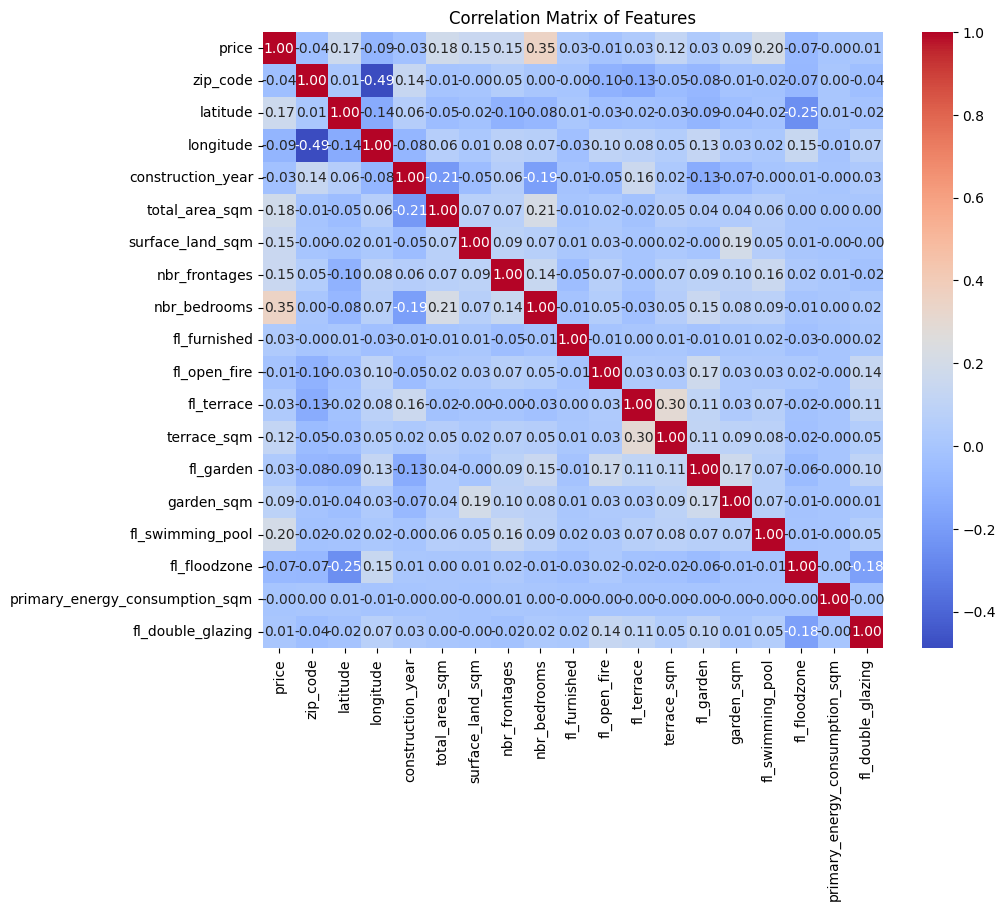

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [142]:
# Get the correlation of all features with the target variable 'price', excluding the target itself
target_correlation = correlation_matrix['price'].drop('price', axis=0)

# Sort the correlations by their absolute values, but keep the original sign
sorted_correlation = target_correlation.abs().sort_values()

# Display the features with the weakest correlation (closest to zero)
print("Features with the weakest correlation to 'price':\n", sorted_correlation)

Features with the weakest correlation to 'price':
 primary_energy_consumption_sqm    0.001672
fl_double_glazing                 0.005180
fl_open_fire                      0.012991
construction_year                 0.025059
fl_furnished                      0.032489
fl_garden                         0.032506
fl_terrace                        0.034022
zip_code                          0.036896
fl_floodzone                      0.067117
garden_sqm                        0.090278
longitude                         0.090988
terrace_sqm                       0.120644
surface_land_sqm                  0.150300
nbr_frontages                     0.150775
latitude                          0.166976
total_area_sqm                    0.181949
fl_swimming_pool                  0.202767
nbr_bedrooms                      0.352564
Name: price, dtype: float64


# Impute missing values - first try (**df_1**)

In [143]:
# How big are ya? Number of observations & features
print("Number of observations:", df_1.shape[0])
print("Number of features:", df_1.shape[1])

# What do you look like? First 5 rows
#print(df.head())

# Do you have any missing values?
missing_values_count = df_1.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(f"Columns with missing values: {len(columns_with_missing_values)} out of {df.shape[1]}")

percent_missing = (columns_with_missing_values / df_1.shape[0]) * 100
percent_missing_sorted = percent_missing.sort_values(ascending=False)
print("Index", "| Feature |", "| Missing values |", sep="\t")
for index, (feature, percent) in enumerate(percent_missing_sorted.items(), start=1):
    print(index, feature, f"{percent:.2f}%", sep="\t")


Number of observations: 75498
Number of features: 28
Columns with missing values: 9 out of 28
Index	| Feature |	| Missing values |
1	surface_land_sqm	48.01%
2	construction_year	44.22%
3	primary_energy_consumption_sqm	35.18%
4	nbr_frontages	34.89%
5	latitude	18.67%
6	longitude	18.67%
7	terrace_sqm	17.40%
8	total_area_sqm	10.09%
9	garden_sqm	3.89%


In [144]:
# Check for missing values
missing_values = df_1.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Check data types
print("\nData types:\n", df_1.dtypes)

# Select numerical columns
numerical_cols = df_1.select_dtypes(include=['int64', 'float64']).columns
# Print the list of numerical columns
print("Numerical columns:", list(numerical_cols))

# Select categorical columns
categorical_cols = df_1.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", list(categorical_cols))

# -- For later use, for train.py --

# Step 1: Split the data into features and target variable
# from sklearn.model_selection import train_test_split
# # Assuming X is your features and y is the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Identify missing values
# Check for missing values in training set
# missing_values_train = X_train.isnull().sum()
# print("Missing values in training set:\n", missing_values_train[missing_values_train > 0])
# # Check data types
# print("\nData types:\n", X_train.dtypes)

Missing values:
 latitude                          14094
longitude                         14094
construction_year                 33383
total_area_sqm                     7614
surface_land_sqm                  36249
nbr_frontages                     26344
terrace_sqm                       13140
garden_sqm                         2939
primary_energy_consumption_sqm    26563
dtype: int64

Data types:
 price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped

**Visualize Missing Data**: 

Before imputing, consider visualizing the missing data to understand its pattern. This can be done using libraries like missingno.

In [145]:
# import missingno as msno

# # Visualize missing values
# msno.matrix(df)

# ACTION CELL: IMPUTATION

In [146]:
# -- ACTION CELL --

from sklearn.impute import SimpleImputer

# Imputer for numerical data
num_imputer = SimpleImputer(strategy='median')
df_1[numerical_cols] = num_imputer.fit_transform(df_1[numerical_cols])

# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')
df_1[categorical_cols] = cat_imputer.fit_transform(df_1[categorical_cols])

# Check again for missing values
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after[missing_values_after > 0])


# -- For use later, on training and testing data --
# Step 3: Impute missing values
# For numerical data
# from sklearn.impute import SimpleImputer
# # Imputer for numerical data
# num_imputer = SimpleImputer(strategy='median')
# # Assuming 'numerical_cols' is a list of your numerical columns
# X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])
# For categorical data
# Imputer for categorical data
# cat_imputer = SimpleImputer(strategy='most_frequent')
# # Assuming 'categorical_cols' is a list of your categorical columns
# X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
# X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

Missing values after imputation:
 latitude                          14097
longitude                         14097
construction_year                 33386
total_area_sqm                     7615
surface_land_sqm                  36249
nbr_frontages                     26345
terrace_sqm                       13140
garden_sqm                         2939
primary_energy_consumption_sqm    26566
dtype: int64


**Analyze the Impact**: 

After imputation, analyze how the imputation might have affected the distribution of your data. For numerical data, histograms or box plots can be useful; for categorical data, bar charts showing the frequency of each category can be insightful.

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# For numerical data
sns.histplot(df['numerical_column'], kde=True)
plt.title('Distribution after Imputation')
plt.show()

# For categorical data
sns.countplot(x=df['categorical_column'])
plt.title('Frequency after Imputation')
plt.xticks(rotation=45)
plt.show()

KeyError: 'numerical_column'

# Correlation matrix (after imputing)

# [ ACTION CELL ]

Based on the correlation matrix, I've decided to try to drop all features that have a very weak correlation to the target variable (under 0.18)

## CAREFUL: From now on, we work with **df_2**

In [97]:
# - ACTION CELL -

# Identify columns with correlation weaker than 0.18
columns_to_drop = target_correlation[target_correlation.abs() < 0.18].index

# Drop these columns from the DataFrame
df_2 = df_1.drop(columns=columns_to_drop)

# Print the names of the dropped columns for confirmation
print(f"Dropped columns: {list(columns_to_drop)}")

# Print the number of rows and columns in the new DataFrame
print("Number of features before dropping weakly correlated:", df_1.shape[1])
print("Number of features in newest df:", df_2.shape[1])


Dropped columns: ['zip_code', 'latitude', 'longitude', 'construction_year', 'surface_land_sqm', 'nbr_frontages', 'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_floodzone', 'primary_energy_consumption_sqm', 'fl_double_glazing']
Number of features before dropping weakly correlated: 28
Number of features in newest df: 13


# [ I'm Tired... ]
